# [CPSC 310](https://github.com/GonzagaCPSC310) Data Mining
[Gonzaga University](https://www.gonzaga.edu/)

[Gina Sprint](http://cs.gonzaga.edu/faculty/sprint/)

# Data Visualization
What are our learning objectives for this lesson?
* Generate plots using matplotlib
* Create different kinds of plots, including:
    * Line plots
    * Bar plots
    * Histograms
    * Scatter plots
    * Box and whisker plots

Content used in this lesson is based upon information in the following sources:
* Dr. Shawn Bowers' Data Mining notes
* [Matplotlib website](http://matplotlib.org/faq/usage_faq.html)

## 2/1 Warm-up Task(s)
* Open DataVisualizationFun
    * Create a file called utils.py
    * We will put re-usable, general utility variables and functions in utils.py 
* Open DataPreprocessingFun
    * Copy the header and msrp_table lists and the get_column() function to DataVisualizationFun/utils.py
* In DataVisualizationFun/main.py: Given a table, write code to calculate and return the frequencies (occurrence counts) of values of one of its (numerical) attributes.
    * Test your function on ModelYear attribute
    * It would be good to add a few more rows to msrp_table for testing
    
## 2/4 Warm-up Task(s)
* Read the "An Aside: Group By" section below
* In DataVisualizationFun/main.py: Write a function that takes a table and an attribute index, partitions the rows of the table by the attribute, and then returns the resulting partitions (as a list of "tables")
    * Test your function on ModelYear attribute
    * It would be good to add a few more rows to msrp_table for testing

### An Aside: Group By
Typically to create the list of distributions, you'll perform a "group by" operation. A group by operation is grouping (or partitioning) rows or attributes values by another attribute value.

For example, you might have a table like the following:

CarName |ModelYear |MSRP
-|-|-
ford pinto |75 |2769
toyota corolla |75 |2711
ford pinto |76|3025
toyota corolla|77 |2789

Let's group the rows by ModelYear, meaning putting all the cars from the year 1975 in one list, all of the cars from the year 1976 in one list, etc. This would create the following partitions (sub tables):

CarName |ModelYear |MSRP
-|-|-
ford pinto |75 |2769
toyota corolla |75 |2711


CarName |ModelYear |MSRP
-|-|-
ford pinto |76|3025


CarName |ModelYear |MSRP
-|-|-
toyota corolla|77 |2789


Then extract the MPG from each list to get a set of different MPG series, one for each year. Then you could visualize the data with model year on the x-axis, MPG on the y-axis, and one box and whisker for each model year.

## Data Visualization
Data visualization is important at many steps in the data analytics work flow. Exploratory data analysis includes visualizing the data to get a birds-eye view of the data. Visualizations can quickly tell you if there are missing data, outliers, and general trends/patterns. Once the data analysis has moved beyond the exploratory phase, visualizations are generated to summarize results and include in a write-up of findings.

Our visualizations will be "graphs", "charts", or "plots"... but what is the difference between these names?
* Graph for (math) functions
* Plot for "points"
* Chart is a more general term for a graph or plot
* e.g., line graph, scatterplot, pie chart, etc.

Here are some general tips for creating charts:
1. Be generous with labels!
    * Always label the chart (chart title)
    * Always label all the axes
    * Always provide units (if applicable)
    * Use color schemes/patterns that "print" well (e.g., to black and white)
1. Be creative, with the goal to emphasize readability/understanding
1. Goal is to be informative (and accurate)

While there are many data visualization libraries available in Python, we will focus on using the [matplotib](https://matplotlib.org/) package for the following reasons:
1. It is easy to use
1. It is highly documented and widely used
1. It has Jupyter Notebook support

## Matplotlib
matplotlib is included with the Anaconda Python distribution. If you need to install for a different installation of Python that doesn't include matplotlib, run `pip install numpy` then `pip install matplotlib`.

There are different ways to use matplotlib:
1. `matplotlib.pyplot` module: a non-OOP, state-machine environment is the interface to simple functions to add plot elements to the current axes in the current figure. The state-machine implicitly and automatically creates figures and axes to achieve the desired plot.
1. Hybrid `pyplot`/OOP: using `pyplot` for figure generation, but the programmer keeps track of the figure and axes objects.
1. Purely object oriented interface: useful for embedding matplotlib plots in GUI applications.

We will mostly work with the first two options.

By default, matplotlib plots will show up in an external window. In this set of notes, I'm using Jupyter Notebook to run Python code. One major feature of the Jupyter Notebook is the ability to display plots in line that are the output of running code cells.

Let's generate a matplotlib figure. First, we need to `import matplotlib.pyplot as plt`, make up some x and y values, and plot away!

In [1]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7]
y = [1,1,2,3,5,8,13]

plt.plot(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

We can change the code in the above cell and re-run the cell, the plot will be updated.

Note: `plt.plot()` returns a list of `Lines2D` objects, which we are ignoring (for now).

### Saving a Figure to PDF
So you can view your plots after your program as executed, it is helpful to save them to PDFs.

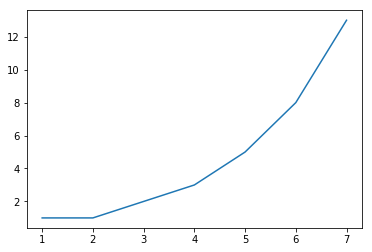

In [2]:
plt.plot(x, y)
# creates a file called fig1.pdf in the current working directory
plt.savefig("fig1.pdf")

### Parts of a Figure
<img src="http://matplotlib.org/_images/fig_map.png" width=300>
(image from http://matplotlib.org/faq/usage_faq.html)

The following class descriptions are adapted from the [Matplotlib website](http://matplotlib.org/faq/usage_faq.html): 

#### Figure
The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of `Axes`, but to be useful should have at least one.

#### Axes
This is what you think of as 'a plot', it is the region of the image with the data space (marked as the inner blue box). A given figure can contain many `Axes`, but a given `Axes` object can only be in one Figure. The `Axes` contains two (or three in the case of 3D) `Axis` objects (be aware of the difference between `Axes` and `Axis`) which take care of the data limits (the data limits can also be controlled via set via the `set_xlim()` and `set_ylim()` `Axes` methods). Each `Axes` has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`).

The `Axes` class and it's member functions are the primary entry point to working with the OOP interface.

#### Axis
These are the number-line-like objects (circled in green). They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a `Locator` object and the ticklabel strings are formatted by a `Formatter`. The combination of the correct `Locator` and `Formatter` gives very fine control over the tick locations and labels.

#### Artist
Basically everything you can see on the figure is an artist (even the `Figure`, `Axes`, and `Axis` objects). This includes `Text` objects, `Line2D` objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most `Artist`s are tied to an `Axes`; such an `Artist` cannot be shared by multiple `Axes`, or moved from one to another.

### Common pyplot Functions/Uses
* `plt.figure()`
    * "resets" the current figure
* `plt.xlabel(text)`
    * add an x-axis label to figure
* `plt.ylabel(text)`
    * add a y-axis label to figure
* `plt.title(text)`
    * add a title to figure
* `plt.grid(True)`
    * add a background grid to chart
* `plt.savefig(filename)`
    * save current figure to file
* `plt.xticks(vals, labels)`
    * set x-axis tick range/values
* `plt.yticks(vals, labels)`
    * set y-axis tick range/values
* Use the `numpy` library
    * `import numpy as np`
    * `np.arange(start, stop, step)` ... like `range()` (works for floats)

### OO Interface
Since pyplot functions modify the "current `Figure`", we may want to explicitly store references to `Figure` and `Axes` objects to update later in the code. There are a few ways to do this:
1. `plt.gcf()` and `plt.gca()`: returns references to the current `Figure` (e.g. `gcf()`) and `Axes` (e.g. `gca()`)
1. `plt.subplots()`: creates new `Figure` and `Axes` objects
    * Example: `fig, ax = plt.subplots()`

## Plot Examples
### Line Plots
Line plots are used to plot (x, y) pairs. The pairs can be connected by a line, or not connected by a line.

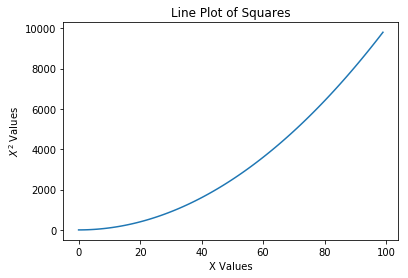

In [3]:
import numpy as np # numpy is a numerical computing library 

x = np.arange(0, 100)
squares = x ** 2
plt.xlabel("X Values")
# Latex!!
plt.ylabel("$X^2$ Values")
plt.title("Line Plot of Squares")
plt.plot(x, squares)
plt.show()

We can add alot of bells and whistles to our plot:
1. Formatting for the line and markers
1. Title
1. X and Y axis labels
1. Legend
1. More

Read the [matplotlib lines API](http://matplotlib.org/api/lines_api.html) to find out all the possible options. Here are a few examples:

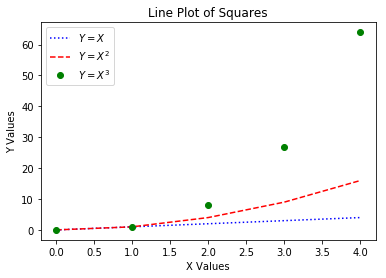

In [4]:
# downsampling in order to see the markers more clearly
x = np.arange(0, 5)
squares = x ** 2
cubes = x ** 3
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Line Plot of Squares")
plt.plot(x, x, c="b", ls=":", label="$Y=X$")
plt.plot(x, squares, c="r", ls="--", label="$Y=X^{2}$")
plt.plot(x, cubes, c="g", ls="", marker="o", label="$Y=X^{3}$")
# loc is a keyword to set the legend's location
plt.legend(loc=2)
plt.show()

### Bar Charts
Bar charts are useful for "histograms" (i.e. frequency diagrams) of both categorical and continuous data.

The main function: `plt.bar(xs, ys, spacing, ... other args)`

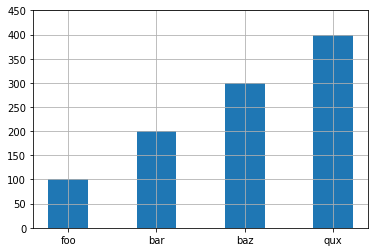

In [23]:
import numpy as np

# reset figure
plt.figure()

# define x and y values
xs = [1, 2, 3, 4]
ys = [100, 200, 300, 400]

# calculate a range (make y a bit bigger)
xrng = np.arange(len(xs))
yrng = np.arange(0, max(ys)+100, 50)

# create the bar chart (.45 relativebar width)
plt.bar(xrng, ys, 0.45, align="center") 
# note: default alignment is center

# define x and y ranges (and value labels)
plt.xticks(xrng, ["foo", "bar", "baz", "qux"])
plt.yticks(yrng)
# turn on the background grid
plt.grid(True)
plt.show()

### Histograms
Pyplot can generate histograms automatically. The default number of bins is 10. 

The main function: `plt.hist(xs, bins=n, ... other args)`

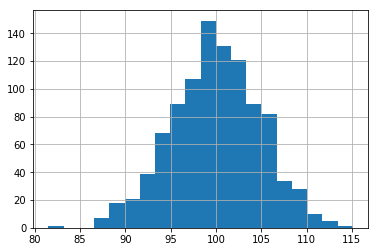

In [22]:
# reset figure
plt.figure()

# create a normal distribution
mu, sigma = 100, 5 # mean and standard deviation
xs = np.random.normal(mu, sigma, 1000)

# create the bar chart (alpha is transparency, b is blue)
plt.hist(xs, bins=20, alpha=0.75, color="b")

# turn on the background grid
plt.grid(True)
plt.show()

### Pie Charts
A pie chart is another way of displaying frequency diagrams.

The main function: `plt.pie(counts, labels=values, ... other args)`

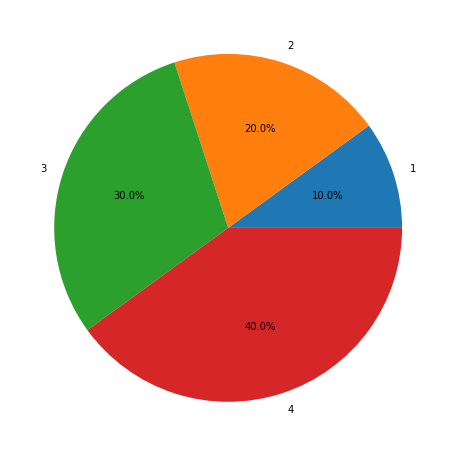

In [7]:
# reset figure, make it square
plt.figure(figsize=(8,8))

# define x and y values
xs = [1, 2, 3, 4]
ys = [100, 200, 300, 400]

# create the bar chart (with pcts)
plt.pie(ys, labels=xs, autopct="%1.1f%%")
plt.show()

### Dot (Strip) Charts
Useful for getting a quick sense of how continuous data points are distributed.

The main function: `plt.plot(xs, ys, color and shape, ... other args)`

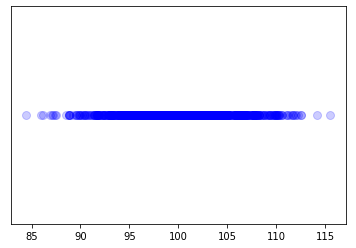

In [8]:
# reset figure
plt.figure()

# create a normal distribution
mu, sigma = 100, 5 # mean and standard deviation
xs = np.random.normal(mu, sigma, 1000)

# sort the values
xs.sort()

# create dummy y values
ys = [1] * len(xs)

# create the dot chart
# "b." means draw a blue dot
# alpha=0.2 sets transparency
# markersize=16 is the size of the dot
plt.plot(xs, ys, "b.", alpha=0.2, markersize=16)

# get rid of the y axis
plt.gca().get_yaxis().set_visible(False)
plt.show()

### Scatter Plots
Scatter plots are useful for looking at the relationships between attributes (primarily continuous data).

The main function (plot again): `plt.plot(xs, ys, color and shape, ... other args)`

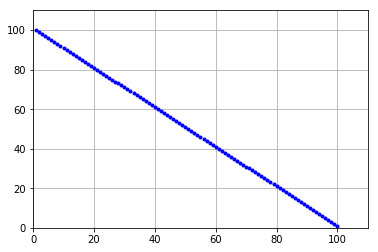

In [21]:
# reset figure
plt.figure()

# create xs and ys
xs = list(range(1, 101, 1))
ys = list(range(100, 0, -1))

# create the scatter plot
plt.plot(xs, ys, "b.")

# make axis a bit longer and wider
plt.xlim(0, int(max(xs) * 1.10))
plt.ylim(0, int(max(ys) * 1.10))
plt.grid(True)

plt.show()

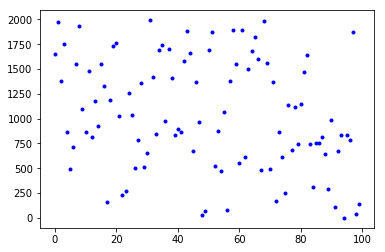

In [10]:
# randomly pick 100 unique values from 0 - 1999
ys = np.random.choice(2000, 100, replace=False)
xs = list(range(len(ys)))
          
# create the scatter plot
plt.plot(xs, ys, "b.")
plt.show()

Here is another scatter plot example that is adapted from the [Matplotlib website](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html):

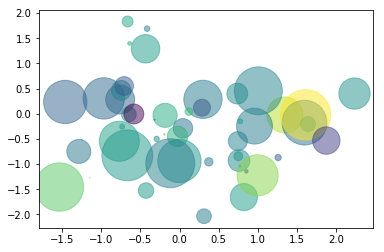

In [11]:
import math

N = 50
x = np.random.randn(N)
y = np.random.randn(N)
colors = np.random.randn(N)
rand_area = np.random.randn(N)
area = math.pi * (15 * rand_area) ** 2 # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### Box (and Whisker) Plots
Box plots are useful for showing a distribution of categories of data. Box plots use five numbers to summarize a distribution for dispersion (spread):
* median (2nd quartile)
* 1st and 3rd quartiles
* smallest and largest individual observations

Box plots use the five-number summary visually in the following ways:
* a box representing interquartile range (2nd and 3rd quartiles)
* median marked by a line in the box
* two lines (called whiskers) outside box extend to smallest and largest values
* however, smallest and largest are those within 1.5 × interquartile range
* remaining values displayed (marked) as "outliers"

The main function: `plt.boxplot(list_of_series)`

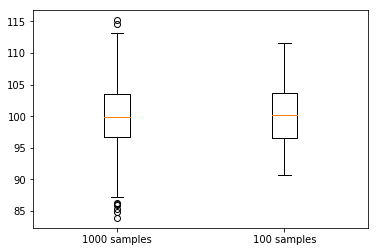

In [12]:
# create the figure
plt.figure()

# two normal distributions
mu, sigma = 100, 5
xs1 = np.random.normal(mu, sigma, 1000)
xs2 = np.random.normal(mu, sigma, 100)

# create boxplot with two distributions
plt.boxplot([xs1, xs2])

# set x-axis value names
plt.xticks([1, 2], ["1000 samples", "100 samples"])
plt.show()

### Multiple Frequency Diagrams
Use a multiple frequency diagram to compare multiple frequency distributions to compare (discrete) attributes.

<Figure size 432x288 with 0 Axes>

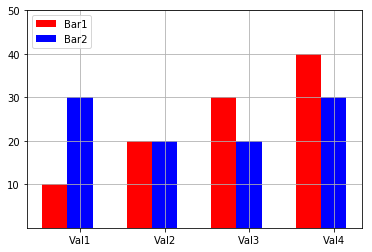

In [13]:
# create the figure
plt.figure()

# two simple frequencies
xs1 = [10, 20, 30, 40]
xs2 = [30, 20, 20, 30]

fig, ax = plt.subplots()

# create two bars, one for each distribution
# spacing can be a tricky
r1 = ax.bar([1, 2, 3, 4], xs1, 0.3, color="r")
r2 = ax.bar([1.3, 2.3, 3.3, 4.3], xs2, 0.3, color="b")

# set tick locations
ax.set_xticks([1.3, 2.3, 3.3, 4.3])
ax.set_yticks([10, 20, 30, 40, 50])

# set x value labels
ax.set_xticklabels(["Val1", "Val2", "Val3", "Val4"])

# create a legend
ax.legend((r1[0], r2[0]), ("Bar1", "Bar2"), loc=2)

plt.grid(True)
plt.show()

## Annotations
Can add various annotations to a pyplot figure. The `xycoords` keyword argument specifies the coordinate system to use for the placement of the annotation. By default this is "data", but you could specify it to be a different coordinate system like "axes fraction" where 0,0 is the lower left of axes and 1,1 is the upper right (regardless of scale of data being displayed).

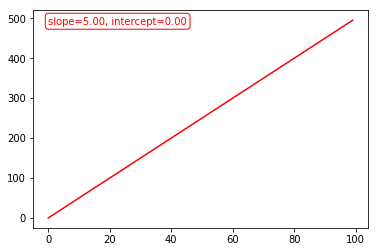

In [14]:
plt.figure()

slope = 5.0
inter = 0.0

points = [(i, i * slope + inter) for i in range(0, 100)]
x = [x for x, _ in points]
y = [y for _, y in points]
plt.plot(x, y, "r")

ax = plt.gca()
text_x = 0
text_y = max(y) - 10
ax.annotate("slope=%.2f, intercept=%.2f" %(slope, inter),
    xy=(text_x, text_y), xycoords='data', color="r",
    bbox=dict(boxstyle="round", fc="1", color="r"))
plt.show()

## Adjusting Plot Parameters
If you want to adjust the plot parameters, such as making text larger or a figure larger, you can do that by setting the [Matplotlib rc parameters](http://matplotlib.org/users/customizing.html#matplotlib-rcparams). Here is an example:

Original figure size: [6.0, 4.0]
Original font size: 10.0


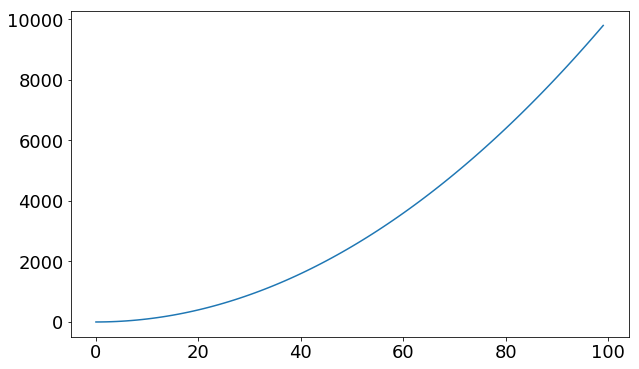

In [15]:
# code to make the plot bigger
# save parameter values for later 
fig_size_orig = plt.rcParams["figure.figsize"] 
print("Original figure size:", fig_size_orig)
font_size_orig = plt.rcParams["font.size"] 
print("Original font size:", font_size_orig)
# Set figure width, height in inches
fig_size = (10, 6)
plt.rcParams.update({"figure.figsize": fig_size})
plt.rcParams.update({'font.size': 18})

# test it out
x = np.arange(0, 100)
squares = x ** 2
plt.plot(x, squares)
plt.show()

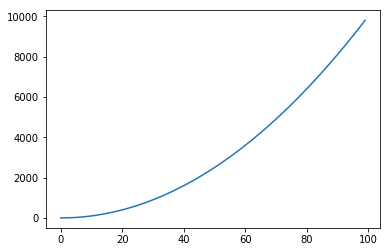

In [16]:
# make the plot back to its normal size
plt.rcParams.update({"figure.figsize": fig_size_orig})
plt.rcParams.update({'font.size': font_size_orig})

x = np.arange(0, 100)
squares = x ** 2
plt.plot(x, squares)
plt.show()